In [2]:
library(tidyverse)
library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks raster::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::select()  masks raster::select()


ERROR: Error in library(patchwork): there is no package called ‘patchwork’


In [3]:
library(raster)
library(gdalUtils)

Loading required package: sp


In [10]:
# get all the rasters aso tiles
#list files in a specific folder
veg_aso <- list.files(path = "~/veg")

In [11]:
asos <- list()
preds <-list()
for (vaso in veg_aso)
{
    #print(vaso)
    recur = list.files(path=paste("~/veg/",vaso,sep=""),recursive = TRUE)
    #print(recur)
    for (filename in recur)
        {
          if (startsWith(filename,'mask/') & endsWith(filename,"merged.tif"))
              asos <- append(asos,paste("~/veg/",vaso,"/",filename,sep=""))
              
           if (startsWith(filename,'preds/') & endsWith(filename,"merged.tif"))
              preds <- append(preds,paste("~/veg/",vaso,"/",filename,sep=""))    
        }
}

print(asos) 
print(preds)        
    

[[1]]
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[2]]
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[3]]
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[4]]
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[5]]
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181110_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_U

In [12]:
aso_un <- unlist(asos)
pred_un <- unlist(preds)

In [22]:
asos <- list()
preds <-list()
asos_str<-""
preds_str<-""
for (vaso in veg_aso)
{
    #print(vaso)
    recur = list.files(path=paste("~/veg/",vaso,sep=""),recursive = TRUE)
    #print(recur)
    for (filename in recur)
        {
          if (startsWith(filename,'mask/') & endsWith(filename,"merged.tif"))
              asos <- append(asos,paste("~/veg/",vaso,"/",filename,sep=""))

           if (startsWith(filename,'preds/') & endsWith(filename,"merged.tif"))
              preds <- append(preds,paste("~/veg/",vaso,"/",filename,sep=""))
        }
}


unlist(asos)

[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [2] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [3] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [4] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [5] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181110_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [6] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181111_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [7] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181112_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [8] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181113_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [9] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181319_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[10] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181320_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[11] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181322_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[12] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181323_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

In [43]:
aso_un_list <- paste(aso_un, collapse=' ' )
pred_un_list <- paste(pred_un, collapse=' ' )

In [39]:
t1 <- try(system(paste("gdalbuildvrt veg_gdal_aso.vrt " , aso_un_list,sep=""), intern = TRUE))

In [44]:
t2 <- try(system(paste("gdalbuildvrt veg_gdal_pred.vrt " , pred_un_list,sep=""), intern = TRUE))

In [40]:
t1

[1] "0...10...20...30...40...50...60...70...80...90...100 - done."

In [1]:
t2

ERROR: Error in eval(expr, envir, enclos): object 't2' not found


In [149]:
gdalinfo('veg_gdal_aso.vrt')
rf <- writeRaster(r, filename=file.path(tmp, "test.tif"), format="GTiff", overwrite=TRUE)

[1] "Driver: VRT/Virtual Raster"                                                                                                                                                                                         
 [2] "Files: veg_gdal_aso.vrt"                                                                                                                                                                                            
 [3] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [4] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [5] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [6] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [7] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181110_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [8] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181111_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [9] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181112_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[10] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181113_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[11] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181319_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[12] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181320_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[13] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181322_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[14] "       /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181323_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[15] "Size is 32768, 26633"                                                                                                                                                                                               
[16] "Coordinate System is:"                                                                                                                                                                                              
[17] "GEOGCS[\"WGS 84\","                                                                                                                                                                                                 
[18] "    DATUM[\"WGS_1984\","                                                                                                                                                                                            
[19] "        SPHEROID[\"WGS 84\",6378137,298.257223563,"  

In [41]:
merged_veg_aso <- raster('veg_gdal_aso.vrt')

In [46]:
merged_veg_pred <- raster('veg_gdal_pred.vrt')

In [ ]:
merged_veg_pred

In [147]:
res(merged_veg_aso)

[1] 2.145767e-05 1.690225e-05

In [150]:
rf <- writeRaster(merged_veg_aso, filename="veg_gdal_aso.tif", format="GTiff", overwrite=TRUE)
rf

In [151]:
rf

class       : RasterLayer 
dimensions  : 26633, 32768, 872710144  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.690225e-05  (x, y)
extent      : -119.8938, -119.1907, 37.77939, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/veg_gdal_aso.tif 
names       : veg_gdal_aso 
values      : 0, 1  (min, max)


In [187]:
# extend with a number of rows and columns (at each side)
re_rf<- extend(rf, c(1,0))


ERROR: Error in eval(expr, envir, enclos): object 'ref_rf' not found


In [193]:
re_rf

class       : RasterLayer 
dimensions  : 26635, 32768, 872775680  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.690225e-05  (x, y)
extent      : -119.8938, -119.1907, 37.77938, 38.22957  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/Rtmp2gTaxY/raster/r_tmp_2020-03-26_185505_11967_11922.grd 
names       : veg_gdal_aso 
values      : 0, 1  (min, max)


In [29]:
fo <- list.files(path = "./aso_veg", pattern = ".tif$", full.names = TRUE)
rlo <- lapply(fo, raster)

aso_veg <- do.call(merge, c(rlo, tolerance = 1))

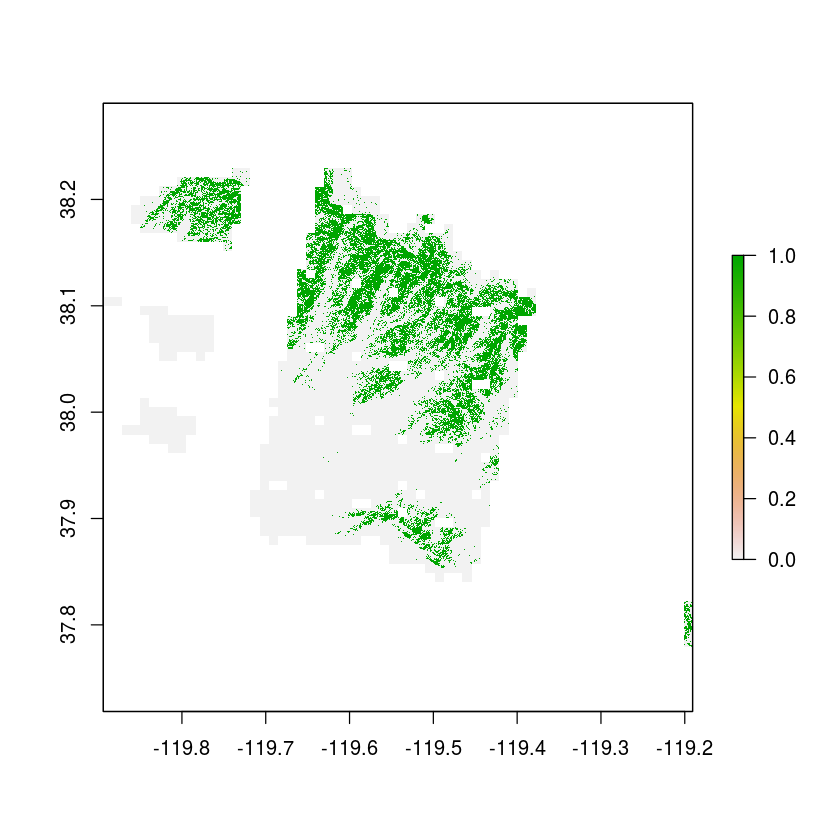

In [30]:
plot(aso_veg)

In [16]:
f <- list.files(path = "./aso_pred", pattern = ".tif$", full.names = TRUE)
rl <- lapply(f, raster)

aso_pred <- do.call(merge, c(rl, tolerance = 1))

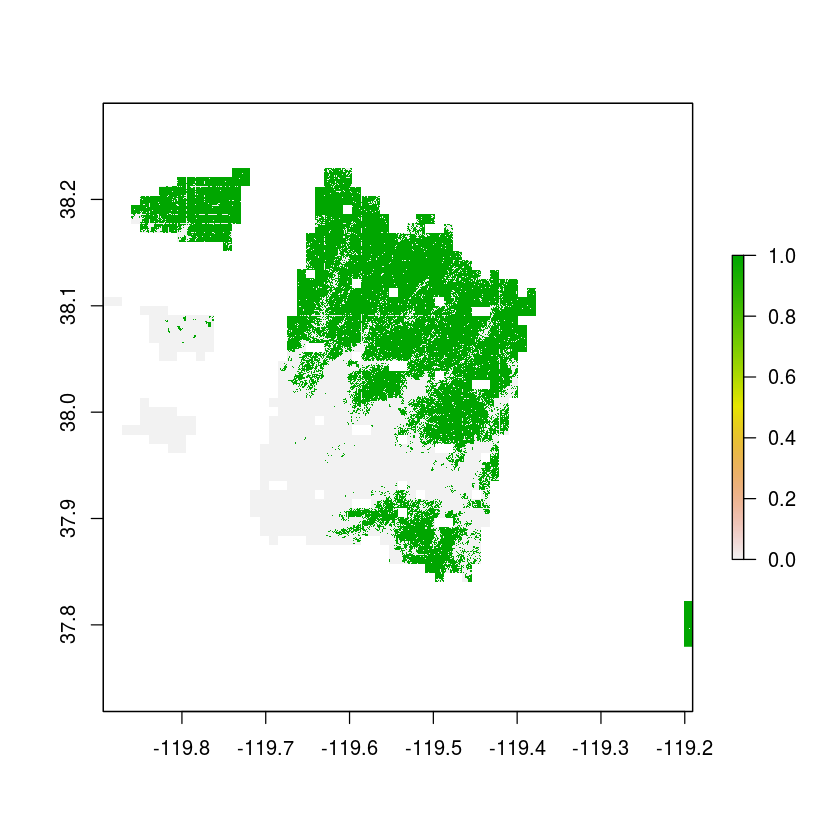

In [18]:
plot(aso_pred)

In [31]:
df <- stack(aso_veg,aso_pred)

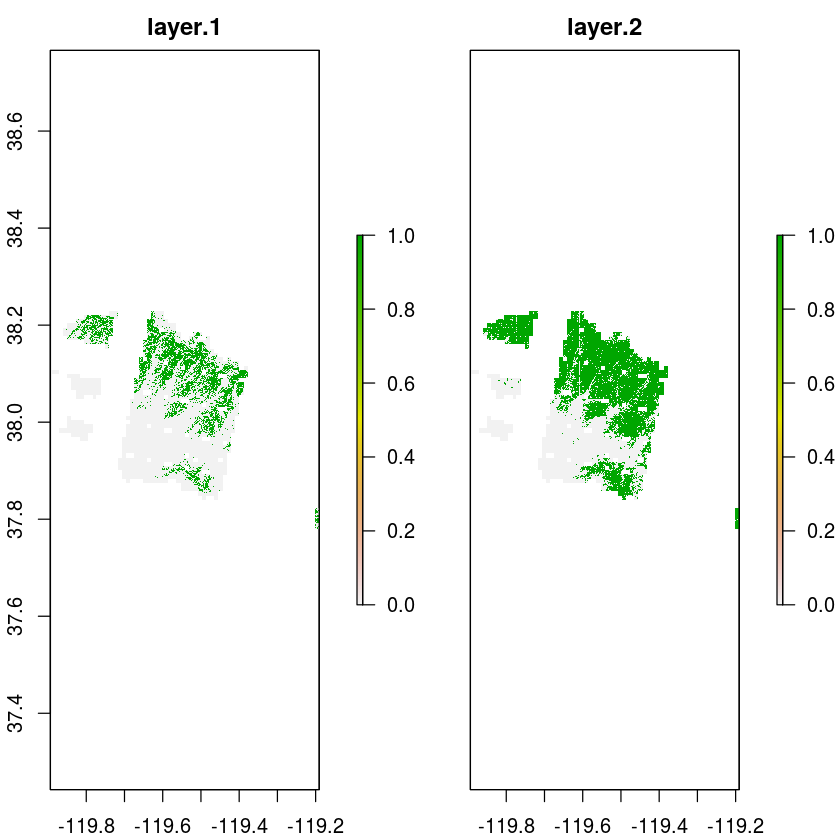

In [32]:
plot(df)

In [15]:
#memory.limit(10000)
#re_rf <- raster(vals=values(rf),ext=extent(pf),crs=crs(pf),
#                  nrows=dim(pf)[1],ncols=dim(pf)[2])

In [ ]:
pred_rf <- raster(vals=values(pred),ext=extent(aso),crs=crs(aso),  nrows=dim(aso)[1],ncols=dim(aso)[2]) 

In [152]:
pf <- writeRaster(merged_veg_pred, filename="veg_gdal_pred.tif", format="GTiff", overwrite=TRUE)
pf

class       : RasterLayer 
dimensions  : 26635, 32768, 872775680  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.690092e-05  (x, y)
extent      : -119.8938, -119.1907, 37.77939, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/veg_gdal_pred.tif 
names       : veg_gdal_pred 
values      : 0, 1  (min, max)


In [66]:
ListRasters <- function(list_names) {
  raster_list <- list() # initialise the list of rasters
   for (i in 1:(length(list_names))){ 
    grd_name <- list_names[i] # list_names contains all the names of the images in .grd format
    raster_file <- raster(grd_name)  
   }
  raster_list <- append(raster_list, raster_file) # update raster_list at each iteration
}

In [131]:

ListRastersRep <- function(list_names) {
  raster_list <- list() # initialise the list of rasters
  f1_rast <- raster(list_names[1])  
   for (i in 1:(length(list_names))){ 
    grd_name <- list_names[i] # list_names contains all the names of the images in .grd format
    raster_file <- raster(grd_name)   
   }
   #print(raster_file) 
  raster_list <- append(raster_list, raster_file) # update raster_list at each iteration
}

In [13]:
listpfimages <- c()
for (as in aso_un){
    listpfimages <- append(listpfimages,as)
}

In [20]:
rlist <-sapply(c(aso_un[1],aso_un[2]), FUN = ListRasters)

In [132]:
rlist_v2 <-sapply(c(aso_un), FUN = ListRastersRep)

In [133]:
rlist_v3 <- rlist_v2
res(rlist_v2[[1]])

[1] 2.145767e-05 1.695663e-05

In [134]:
for (i in 1:length(rlist_v2))
{
        #rlist_v3[i] <- projectRaster(rlist_v2[[i]],rlist_v2[[1]])
        #rlist_v3[i] <- resample(rlist_v3[i],rlist_v2[[1]], resample='bilinear')
        s <- raster(nrow = 2, ncol = 1.6)
        extent(s) <- extent(rlist_v2[[i]])
        rlist_v3[i] <- resample(rlist_v2[[i]], s, method = 'bilinear') # resample output
}
    

Warning message in `[<-`(`*tmp*`, i, value = resample(rlist_v2[[i]], s, method = "bilinear")):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = resample(rlist_v2[[i]], s, method = "bilinear")):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = resample(rlist_v2[[i]], s, method = "bilinear")):
“implicit list embedding of S4 objects is deprecated”

ERROR: Error in setValues(out, .Call("_raster_aggregate_fun", x, dims, as.integer(na.rm), : std::bad_alloc


In [26]:
rlist <- rlist_v3

In [27]:
names(rlist)[1:2] <- c('x', 'y')
rlist$fun <- mean
rlist$na.rm <- TRUE

In [34]:
aso_veg <- do.call(mosaic, rlist)

In [35]:
res(aso_veg)

[1] 2.145767e-05 1.695663e-05

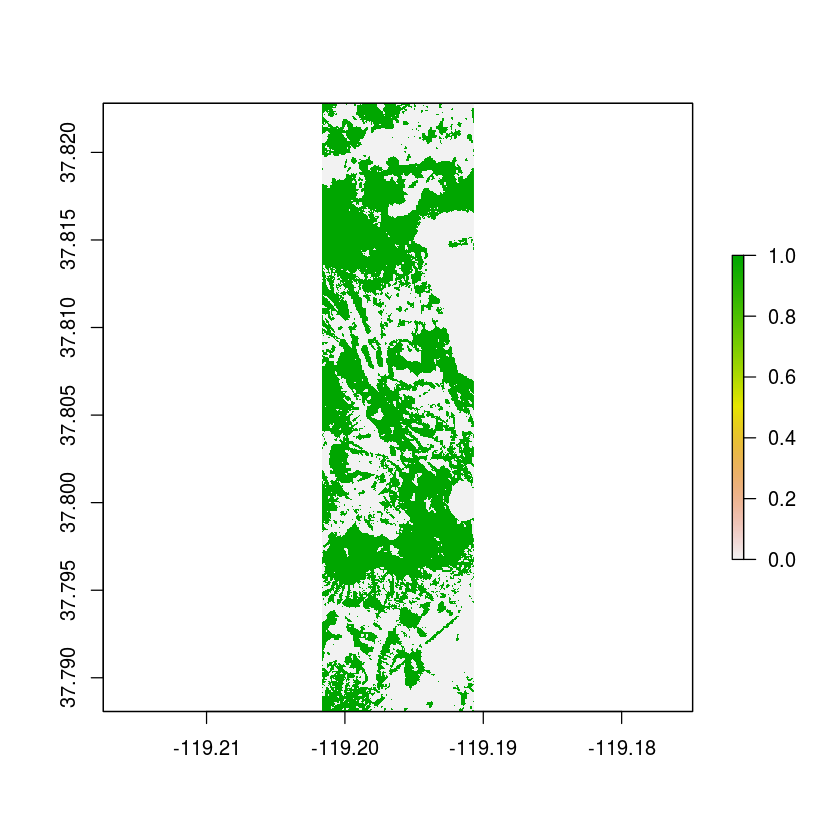

In [36]:
plot(aso_veg)

In [68]:
predlist_v2 <-sapply(c(pred_un), FUN = ListRastersRep)

class       : RasterLayer 
dimensions  : 2048, 512, 1048576  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.2017, -119.1907, 37.78808, 37.8228  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/preds/20180528_180846_1002_3B_AnalyticMS_SR_clip_merged.tif 
names       : X20180528_180846_1002_3B_AnalyticMS_SR_clip_merged 
values      : -32768, 32767  (min, max)

class       : RasterLayer 
dimensions  : 512, 512, 262144  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695862e-05  (x, y)
extent      : -119.2017, -119.1907, 37.7794, 37.78808  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-1

In [69]:
predlist_v3 <- predlist_v2

In [145]:
for (i in 2:length(predlist_v2))
{
        predlist_v3[i] <- projectRaster(predlist_v2[[i]],predlist_v2[[1]])
}
    

Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_v2[[i]], predlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_v2[[i]], predlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_v2[[i]], predlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_v2[[i]], predlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_v2[[i]], predlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_v2[[i]], predlist_v2[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_v2[[i]], predlist_v2[[1]])):
“im

In [136]:
predlist_v3

$`~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/preds/20180528_180846_1002_3B_AnalyticMS_SR_clip_merged.tif`
class       : RasterLayer 
dimensions  : 2048, 512, 1048576  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.2017, -119.1907, 37.78808, 37.8228  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/preds/20180528_180846_1002_3B_AnalyticMS_SR_clip_merged.tif 
names       : X20180528_180846_1002_3B_AnalyticMS_SR_clip_merged 
values      : -32768, 32767  (min, max)


$`~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/preds/20180528_18

In [7]:
system("mkdir aso_veg")

In [8]:
system("mkdir aso_pred")

In [13]:
file.copy(from=pred_un, to='./aso_pred', 
          overwrite = TRUE, recursive = FALSE, 
          copy.mode = TRUE)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [23]:
aso_un

[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [2] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [3] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [4] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [5] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181110_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [6] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181111_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [7] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181112_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [8] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181113_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
 [9] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181319_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[10] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181320_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[11] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181322_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[12] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181323_1005_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

In [28]:
for(i in 1:length(aso_un))
    {
     print(aso_un[i])
    file.copy(from=aso_un[i],to=paste('./aso_veg/',i,'-ASO_3M_SD_USCATE_20180528_binary_merged.tif',sep=""))
}

[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181110_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"


In [27]:
file.copy(from=aso_un, to='./aso_veg', 
          overwrite = FALSE, recursive = FALSE, 
          copy.mode = TRUE)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [121]:
for (i in 1:length(pred_un))
 print(res(raster(pred_un[i])))

[1] 2.145767e-05 1.695663e-05
[1] 2.145767e-05 1.695862e-05
[1] 2.145767e-05 1.686081e-05
[1] 2.145767e-05 1.686681e-05
[1] 2.145767e-05 1.689079e-05
[1] 2.145767e-05 1.690277e-05
[1] 2.145767e-05 1.692273e-05
[1] 2.145767e-05 1.692872e-05
[1] 2.145767e-05 1.685681e-05
[1] 2.145767e-05 1.686081e-05
[1] 2.145767e-05 1.689079e-05
[1] 2.145767e-05 1.691475e-05


In [137]:
rasterOptions(tolerance = 0.5)
raster_files <- list.files(path ="./tmp",pattern = ".tif$",full.names = TRUE )

national_layer <- mosaicList(predlist_v3 )

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘raster’ for signature ‘"numeric"’


In [101]:
plist <- predlist_v3
names(plist) <- NULL
#####This function deals with overlapping areas
plist$fun <- sum
#run do call to implement mosaic over the list of raster objects.
mos <- do.call(raster::mosaic, plist)
#set crs of output
#crs(mos) <- crs(raster(plist[1]))

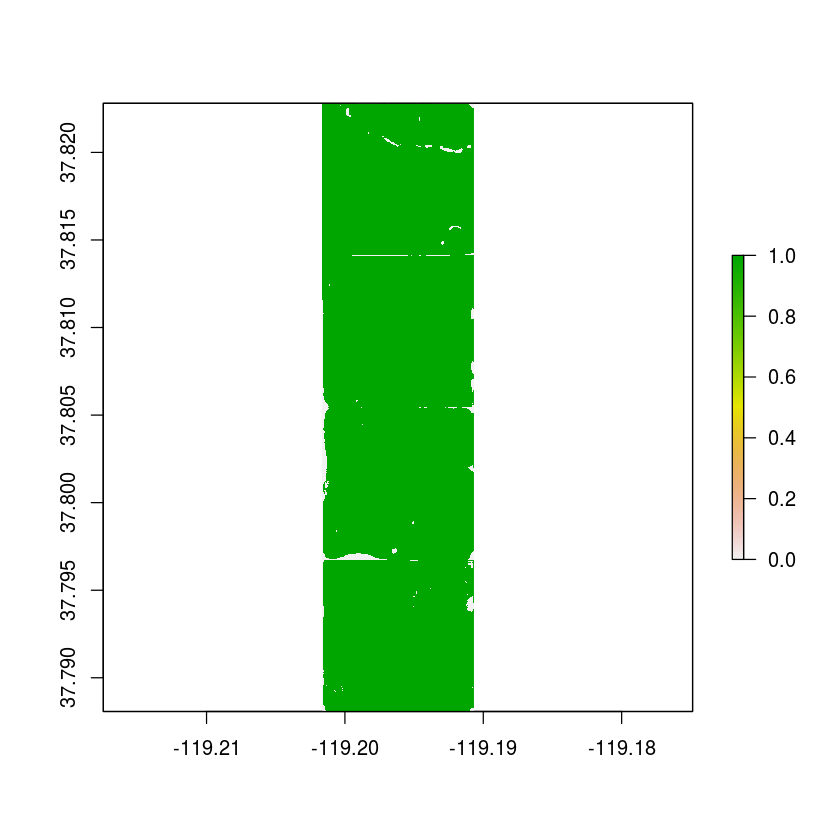

In [102]:
plot(mos)

In [86]:
predlist_v2[1]

$`~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/preds/20180528_180846_1002_3B_AnalyticMS_SR_clip_merged.tif`
class       : RasterLayer 
dimensions  : 2048, 512, 1048576  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.2017, -119.1907, 37.78808, 37.8228  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/preds/20180528_180846_1002_3B_AnalyticMS_SR_clip_merged.tif 
names       : X20180528_180846_1002_3B_AnalyticMS_SR_clip_merged 
values      : -32768, 32767  (min, max)



In [92]:
pred_un[2]

[1] "~/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/preds/20180528_180847_1002_3B_AnalyticMS_SR_clip_merged.tif"

In [93]:
layer1 <- system.file('/home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180846_1002_3B_AnalyticMS_SR_clip/preds/20180528_180846_1002_3B_AnalyticMS_SR_clip_merged.tif', package="gdalUtils")
layer2 <- system.file('/home/ubuntu/veg/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_180847_1002_3B_AnalyticMS_SR_clip/preds/20180528_180847_1002_3B_AnalyticMS_SR_clip_merged.tif', package="gdalUtils")




In [95]:
mosaic_rasters(gdalfile=c(layer1,layer2))
gdalinfo("test_mosaic.envi")


ERROR: Error in mosaic_rasters(gdalfile = c(layer1, layer2)): Some of the input files are missing: Some of the input files are missing: 


In [80]:
pred_veg <- do.call(mosaic, plist)

In [172]:
pred_veg_f <- do.call(merge, plist)

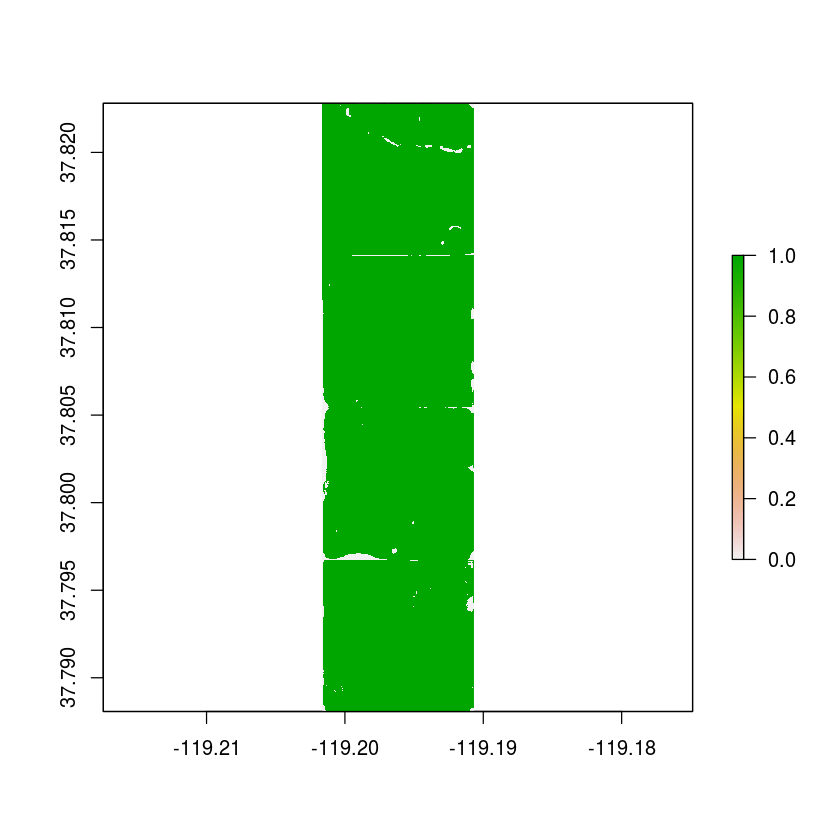

In [81]:
plot(pred_veg)

In [171]:
dim(pred_veg)

[1] 2048  512    1

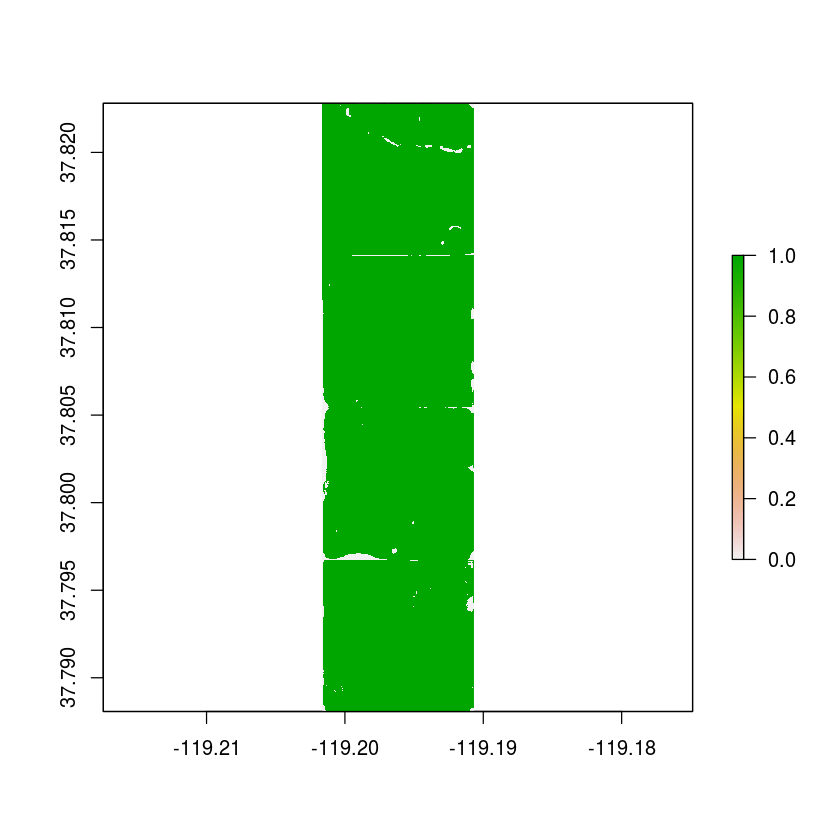

In [39]:
plot(pred_veg)

In [57]:
merged_veg_pred <- resample(merged_veg_pred, merged_veg_aso, resample='bilinear')

In [61]:
merged_veg_pred

class       : RasterLayer 
dimensions  : 26635, 32768, 872775680  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.690092e-05  (x, y)
extent      : -119.8938, -119.1907, 37.77939, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/veg_gdal_pred.vrt 
names       : veg_gdal_pred 
values      : -32768, 32767  (min, max)


In [62]:
pred_veg_aso <- stack(merged_veg_aso,merged_veg_pred)

ERROR: Error in compareRaster(x): different number or rows


In [58]:
merged_veg_aso

class       : RasterLayer 
dimensions  : 26633, 32768, 872710144  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.690225e-05  (x, y)
extent      : -119.8938, -119.1907, 37.77939, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/veg_gdal_aso.vrt 
names       : veg_gdal_aso 
values      : -32768, 32767  (min, max)


In [60]:
r2resampled <- projectRaster(merged_veg_pred,merged_veg_aso,method = 'ngb')

In [ ]:
pred_veg_aso <- stack(aso_veg,pred_veg)

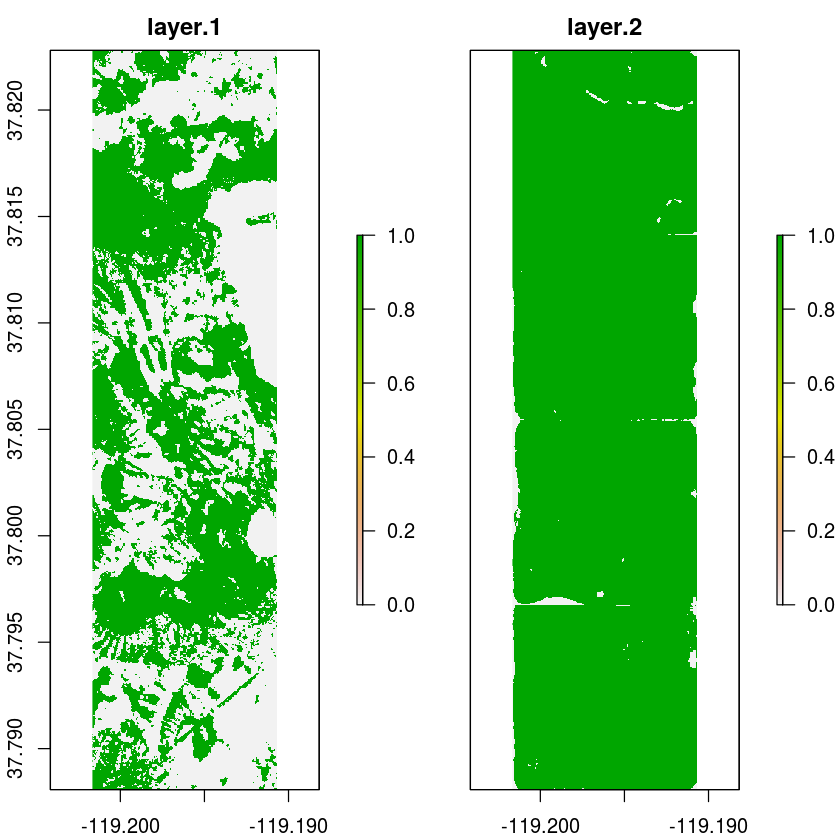

In [41]:
plot(pred_veg_aso)

In [43]:
veg <- raster('~/planet-snowcover/pipeline/veg.tiff')

In [44]:
veg

class       : RasterLayer 
dimensions  : 14959, 19874, 297295166  (nrow, ncol, ncell)
resolution  : 3.115758e-05, 3.115758e-05  (x, y)
extent      : -119.8058, -119.1865, 37.72827, 38.19435  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/veg.tiff 
names       : veg 


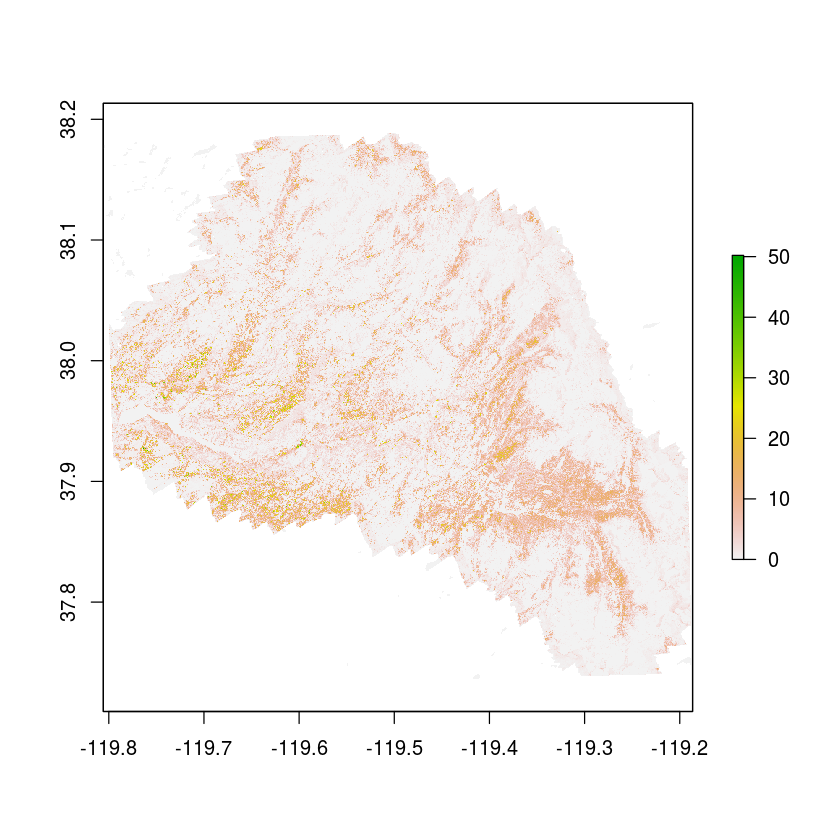

In [45]:
plot(veg)

In [46]:
extent_template <- extent(veg)
print(extent_template)

class       : Extent 
xmin        : -119.8058 
xmax        : -119.1865 
ymin        : 37.72827 
ymax        : 38.19435 


In [48]:
crs(veg)

CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 

In [49]:
res(veg)

[1] 3.115758e-05 3.115758e-05

In [50]:
veg_re <- projectRaster(veg, pred_veg_aso)
vegResamp <- resample(veg_re, pred_veg_aso, resample='bilinear')

In [51]:
veg_crop<-crop(vegResamp,extent(pred_veg_aso))

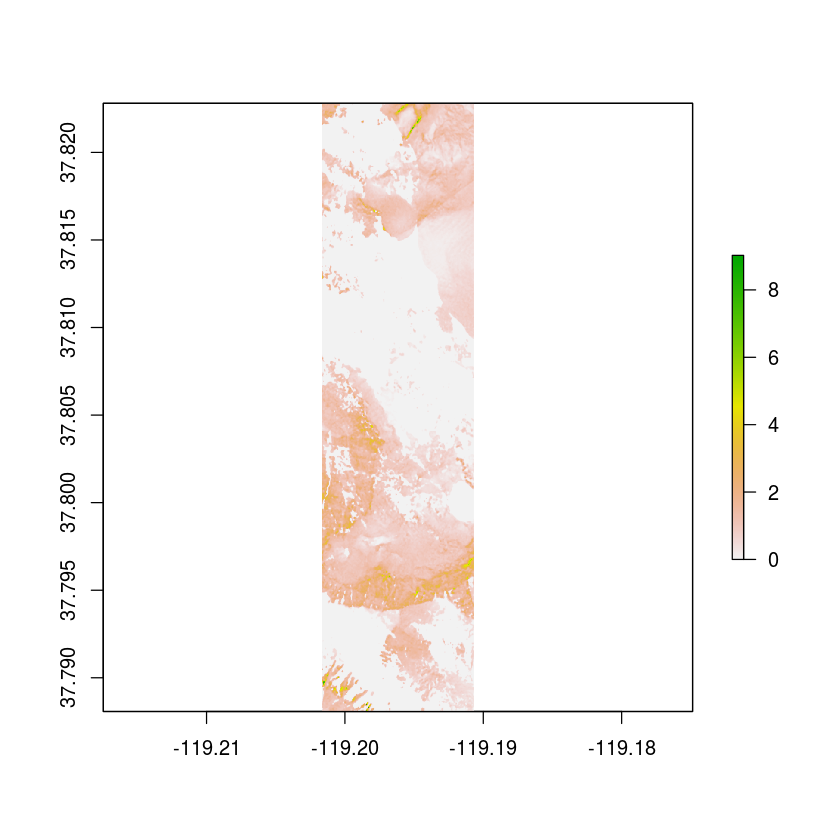

In [52]:
plot(veg_crop)

In [118]:
allthree <- stack (pred_veg_aso,veg_crop)
data_matrix <- rasterToPoints(allthree)
head(data_matrix)

x,y,layer.1,layer.2,veg
-119.2016,37.82279,1,1,1.508473
-119.2016,37.82279,1,1,1.483356
-119.2016,37.82279,1,1,1.436312
-119.2016,37.82279,1,1,1.432309
-119.2016,37.82279,1,1,1.500402
-119.2015,37.82279,1,1,1.430423


In [119]:
datafra_comb <- data_matrix %>% as.data.frame()

In [120]:
colnames(datafra_comb) <- c('x','y','aso','mlveg','veg')

In [121]:
#doing vegetation

library(caret)


In [122]:
lo_veg <- datafra_comb %>% filter(!is.na(veg)) %>% filter(veg <.2 ) %>% as.data.frame()
low_veg_perf<- confusionMatrix(lo_veg$mlveg, lo_veg$aso,mode = "prec_recall")
low_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0   2893   1912
         1 251892 236954
                                          
               Accuracy : 0.4859          
                 95% CI : (0.4845, 0.4873)
    No Information Rate : 0.5161          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0032          
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.602081        
                 Recall : 0.011355        
                     F1 : 0.022289        
             Prevalence : 0.516124        
         Detection Rate : 0.005860        
   Detection Prevalence : 0.009734        
      Balanced Accuracy : 0.501675        
                                          
       'Positive' Class : 0               
                                          

In [123]:
med_veg <- datafra_comb %>% filter(!is.na(veg)) %>% filter(veg >.2 & veg < 2) %>% as.data.frame()
med_veg_perf<- confusionMatrix(med_veg$mlveg, med_veg$aso,mode = "prec_recall")
med_veg_perf


Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0   5747   5127
         1 228663 274302
                                          
               Accuracy : 0.545           
                 95% CI : (0.5437, 0.5464)
    No Information Rate : 0.5438          
    P-Value [Acc > NIR] : 0.04135         
                                          
                  Kappa : 0.0067          
 Mcnemar's Test P-Value : < 2e-16         
                                          
              Precision : 0.52851         
                 Recall : 0.02452         
                     F1 : 0.04686         
             Prevalence : 0.45619         
         Detection Rate : 0.01118         
   Detection Prevalence : 0.02116         
      Balanced Accuracy : 0.50308         
                                          
       'Positive' Class : 0               
                                          

In [124]:
high_veg <- datafra_comb %>% filter(!is.na(veg)) %>% filter(veg > 2) %>% as.data.frame()
high_veg_perf<- confusionMatrix(high_veg$mlveg, high_veg$aso,mode = "prec_recall")
high_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0   915  1183
         1 25333 13655
                                        
               Accuracy : 0.3546        
                 95% CI : (0.35, 0.3593)
    No Information Rate : 0.6389        
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : -0.0331       
 Mcnemar's Test P-Value : <2e-16        
                                        
              Precision : 0.43613       
                 Recall : 0.03486       
                     F1 : 0.06456       
             Prevalence : 0.63886       
         Detection Rate : 0.02227       
   Detection Prevalence : 0.05106       
      Balanced Accuracy : 0.47757       
                                        
       'Positive' Class : 0             
                                        

In [125]:
ndf_veg <- cbind(high_veg_perf$overall %>% as.data.frame(),
      med_veg_perf$overall %>% as.data.frame(),
      low_veg_perf$overall %>% as.data.frame())

In [126]:
ndf_veg_f <- cbind(high_veg_perf$byClass %>% as.data.frame(),
                  med_veg_perf$byClass %>% as.data.frame(),
      low_veg_perf$byClass %>% as.data.frame())

In [127]:
colnames(ndf_veg_f) <-  c('high','med','low')

In [128]:
colnames(ndf_veg) <- c('high', 'med', 'low')

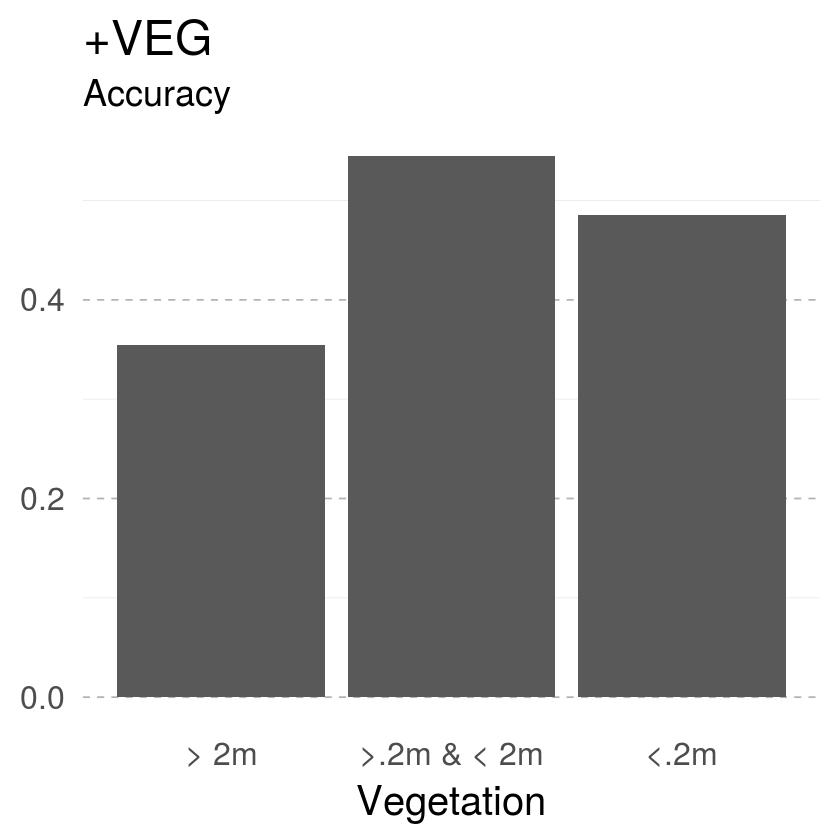

In [132]:
ggplot() + 
geom_bar(aes(x='1',y=ndf_veg['Accuracy',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg['Accuracy',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg['Accuracy',c('low')]),stat="identity") + theme_minimal(base_size = 24) +
ggpubr::theme_cleveland() +labs(x="Vegetation", subtitle="Accuracy",title="+VEG") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

a_veg <- ggplot() + 
geom_bar(aes(x='1',y=ndf_veg['Accuracy',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg['Accuracy',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg['Accuracy',c('low')]),stat="identity") + theme_minimal(base_size = 24) +
ggpubr::theme_pubclean() +labs(x="Vegetation", y="",subtitle="Accuracy",title="+VEG") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))


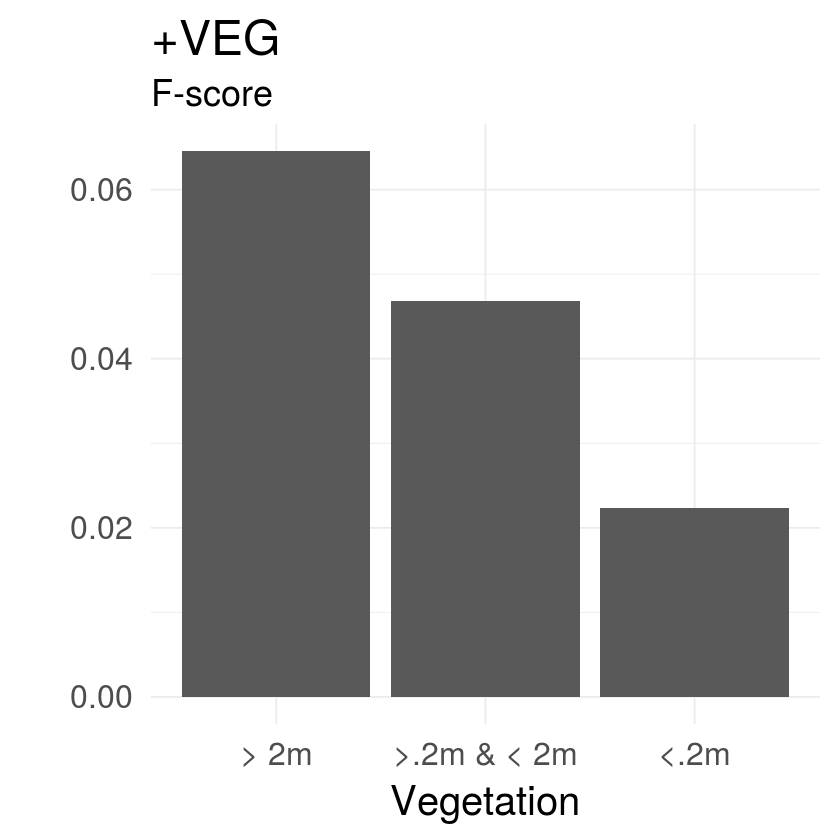

In [145]:
ggplot() + 
geom_bar(aes(x='1',y=ndf_veg_f['F1',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg_f['F1',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg_f['F1',c('low')]),stat="identity") + 
theme_minimal(base_size = 24) +
labs(x="Vegetation",y="", subtitle="F-score",title="+VEG") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

f_veg <- ggplot() + 
geom_bar(aes(x='1',y=ndf_veg_f['F1',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_veg_f['F1',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_veg_f['F1',c('low')]),stat="identity") + 
theme_minimal(base_size = 24) + ggpubr::theme_pubclean() +
labs(x="Vegetation",y="", subtitle="F-score",title="+VEG") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

In [72]:
# get all the rasters aso tiles
#list files in a specific folder
folder <- "~/dem"
dem_aso <- list.files(path = folder)
#DEM only
asos_dem <- list()
preds_dem <-list()
for (vaso in dem_aso)
{
    #print(vaso)
    recur = list.files(path=paste(folder,"/",vaso,sep=""),recursive = TRUE)
    #print(recur)
    for (filename in recur)
        {
          if (startsWith(filename,'mask/') & endsWith(filename,"merged.tif"))
              asos_dem <- append(asos_dem,paste(folder,"/",vaso,"/",filename,sep=""))
              
           if (startsWith(filename,'preds/') & endsWith(filename,"merged.tif"))
              preds_dem <- append(preds_dem,paste(folder,"/",vaso,"/",filename,sep=""))    
        }
}

print(asos_dem) 
print(preds_dem)        
    

[[1]]
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[2]]
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[3]]
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[4]]
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[5]]
[1] "~/dem/planet-snowcover-experiments:planet-snowcover-2020-03-06-21-21-30-038:planet-snowcover-imagery-dem:20180528_181110_1025_3B_AnalyticMS_SR_clip/m

In [73]:
aso_dem_un <- unlist(asos_dem)
pred_dem_un <- unlist(preds_dem)

In [74]:
rlist_aso_dem <-sapply(c(aso_dem_un), FUN = ListRasters)
predlist_pred_dem <-sapply(c(pred_dem_un), FUN = ListRasters)

In [75]:
rlist_aso_dem_repro <- rlist_aso_dem
#reproject to be same
for (i in 2:length(rlist_aso_dem))
{
       rlist_aso_dem_repro[i] <- projectRaster(rlist_aso_dem[[i]],rlist_aso_dem[[1]])
}

Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_dem[[i]], rlist_aso_dem[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_dem[[i]], rlist_aso_dem[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_dem[[i]], rlist_aso_dem[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_dem[[i]], rlist_aso_dem[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_dem[[i]], rlist_aso_dem[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_dem[[i]], rlist_aso_dem[[1]])):
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_dem[[i]

In [76]:
predlist_pred_dem_repro <- predlist_pred_dem
#reproject to be same
for (i in 2:length(predlist_pred_dem))
{
       predlist_pred_dem_repro[i] <- projectRaster(predlist_pred_dem[[i]],predlist_pred_dem[[1]])
}

Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_pred_dem[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_pred_dem[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_pred_dem[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_pred_dem[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_pred_dem[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_pred_dem[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(predlist_pred_dem[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, 

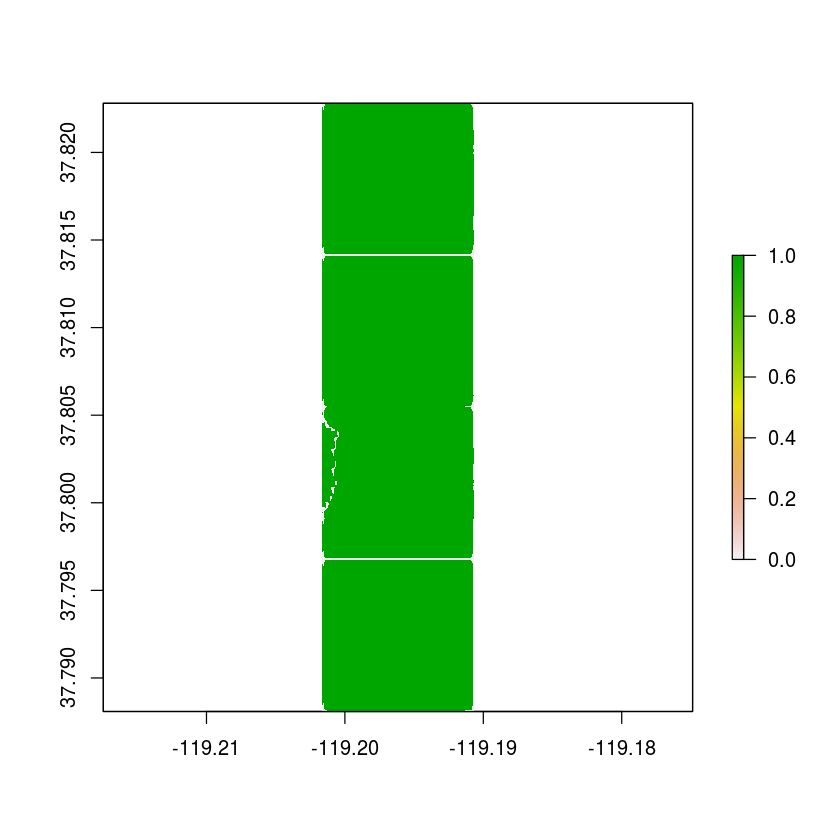

In [78]:
#visualize
names(predlist_pred_dem_repro)[1:2] <- c('x', 'y')
predlist_pred_dem_repro$fun <- mean
predlist_pred_dem_repro$na.rm <- TRUE

pred_dem <- do.call(mosaic, predlist_pred_dem_repro)
plot(pred_dem)

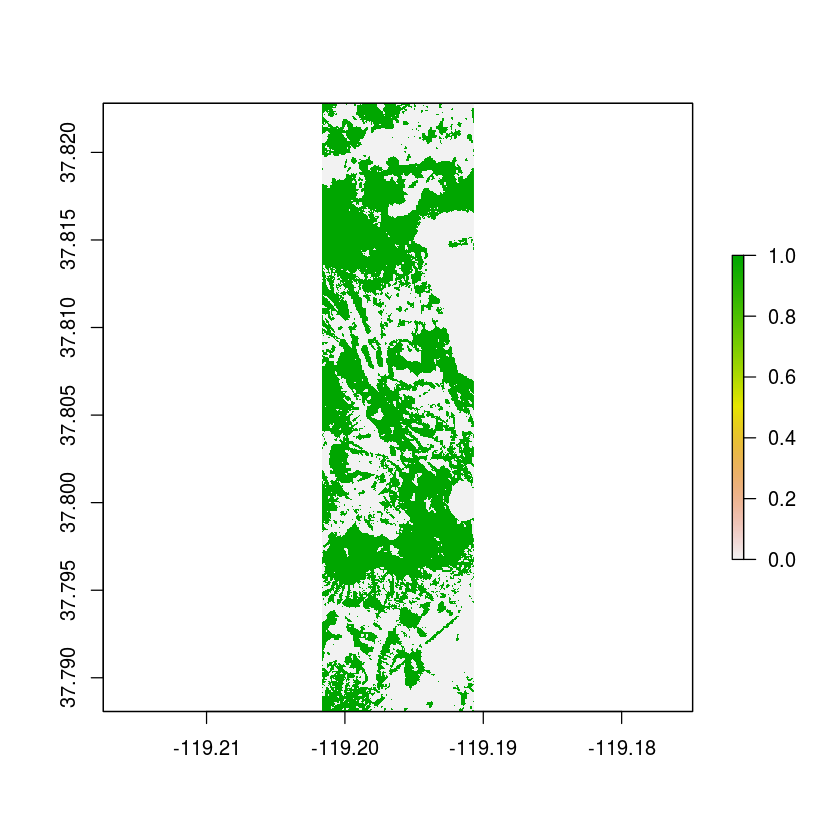

In [79]:
#visualize
names(rlist_aso_dem_repro)[1:2] <- c('x', 'y')
rlist_aso_dem_repro$fun <- mean
rlist_aso_dem_repro$na.rm <- TRUE

aso_dem_orig <- do.call(mosaic, rlist_aso_dem_repro)
plot(aso_dem_orig)

In [85]:
extent(aso_dem_orig)

class       : Extent 
xmin        : -119.2017 
xmax        : -119.1907 
ymin        : 37.78808 
ymax        : 37.8228 

In [86]:
extent(pred_dem)

class       : Extent 
xmin        : -119.2017 
xmax        : -119.1907 
ymin        : 37.78809 
ymax        : 37.8228 

In [89]:
extent(projectRaster(pred_dem,aso_dem_orig))

class       : Extent 
xmin        : -119.2017 
xmax        : -119.1907 
ymin        : 37.78808 
ymax        : 37.8228 

In [90]:
pred_dem_aso <- stack(aso_dem_orig,projectRaster(pred_dem,aso_dem_orig))


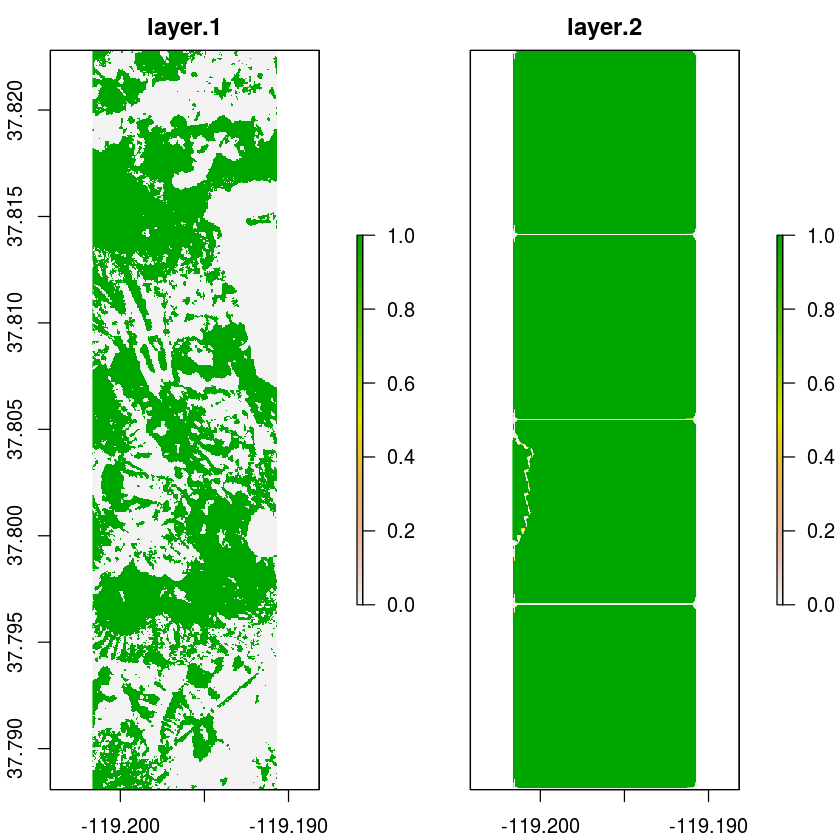

In [91]:
plot(pred_dem_aso)

In [134]:
allthree <- stack(pred_dem_aso,crop(vegResamp,extent(pred_dem_aso)))
data_matrix_dem <- rasterToPoints(allthree)
head(data_matrix_dem)

x,y,layer.1,layer.2,veg
-119.2016,37.82279,1,0,1.508473
-119.2016,37.82279,1,0,1.483356
-119.2016,37.82279,1,0,1.436312
-119.2016,37.82279,1,0,1.432309
-119.2016,37.82279,1,0,1.500402
-119.2015,37.82279,1,0,1.430423


In [135]:
datafra_comb_dem <- data_matrix_dem %>% as.data.frame()
colnames(datafra_comb_dem) <- c('x','y','aso','mldem','veg')

Warning message:
“Removed 512 rows containing non-finite values (stat_bin).”

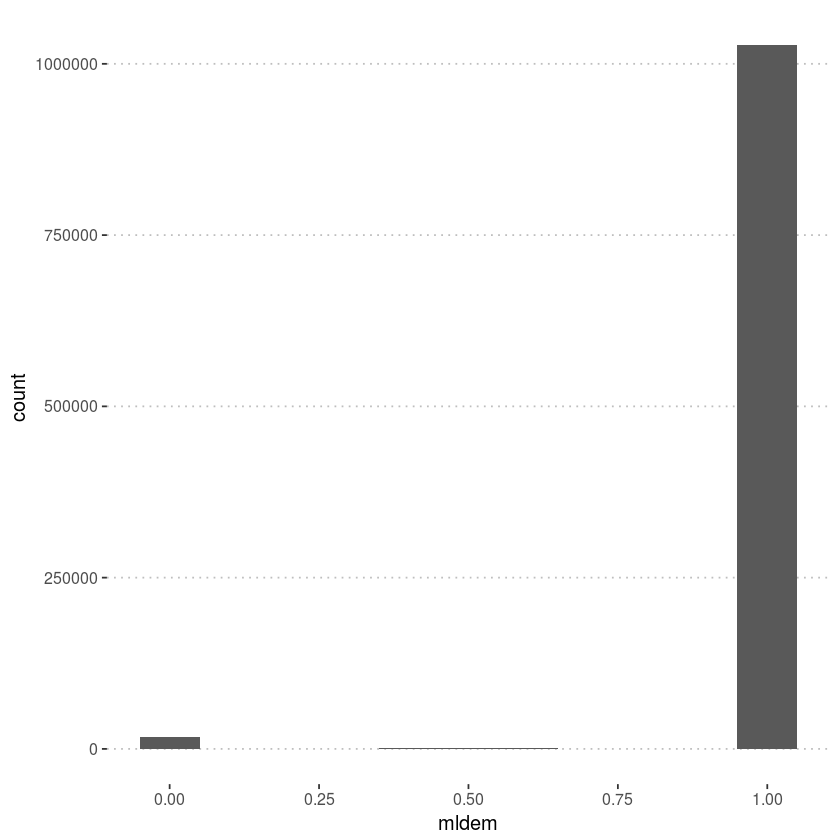

In [136]:
datafra_comb_dem %>% ggplot(aes(mldem)) +
  geom_histogram(binwidth = 0.1) + ggpubr::theme_pubclean()

In [137]:
unique(datafra_comb_dem$mldem)

[1] 0.000000e+00 1.763361e-04 1.000000e+00 1.000000e+00 1.763361e-04
  [6] 1.167828e-13 5.290084e-04 6.622738e-10 1.000000e+00 9.991183e-01
 [11] 6.616899e-10 9.987656e-01 1.234354e-03 8.174799e-13 1.587026e-03
 [16] 1.587026e-03 1.587027e-03 1.051046e-12 1.939699e-03 1.284612e-12
 [21] 6.622738e-10 1.000000e+00 2.645044e-03 1.000000e+00 2.645044e-03
 [26] 2.645044e-03 1.985309e-12 2.997716e-03 2.997717e-03 1.000000e+00
 [31] 1.000000e+00 1.000000e+00 4.055733e-03 2.919572e-12 4.408407e-03
 [36] 4.408406e-03 7.582459e-03 1.000000e+00 1.000000e+00 3.085884e-02
 [41] 9.500968e-01 5.413523e-02 9.423380e-01 6.013066e-02 8.672188e-01
 [46] 1.504148e-01 8.319516e-01 8.298355e-01 5.484105e-10 8.280722e-01
 [51] 8.270141e-01 1.000000e+00 8.263088e-01 5.470091e-10 8.259561e-01
 [56] 1.743965e-01 8.252508e-01 1.161990e-10 1.754546e-01 8.245454e-01
 [61] 5.458413e-10 8.241928e-01 8.241928e-01 1.173668e-10 1.772179e-01
 [66] 1.772179e-01 8.227821e-01 1.000000e+00 8.227821e-01 5.446735e-10
 [71] 8.224294e-01 8.224294e-01 8.224294e-01 1.000000e+00 8.220767e-01
 [76] 1.000000e+00 8.220767e-01 8.220767e-01 5.444399e-10 8.217241e-01
 [81] 8.217241e-01 8.217241e-01 5.442063e-10 8.213714e-01 8.213714e-01
 [86] 8.210187e-01 8.210187e-01 1.803920e-01 1.803920e-01 1.807446e-01
 [91] 1.807446e-01 1.197025e-10 1.810973e-01 1.810973e-01 8.189027e-01
 [96] 5.423378e-10 8.185500e-01 1.000000e+00 6.622738e-10 8.181973e-01
[101] 1.818027e-01 1.204032e-10 1.821553e-01 1.821553e-01 1.821553e-01
[106] 1.206367e-10 1.825080e-01 1.825080e-01 1.208703e-10 1.832134e-01
[111] 1.000000e+00 1.832134e-01 1.215710e-10 1.835660e-01 1.222717e-10
[116] 1.846240e-01 1.000000e+00 1.846240e-01 1.849767e-01 1.867401e-01
[121] 3.461480e-01 6.527939e-01 6.496199e-01 4.288249e-10 6.475038e-01
[126] 6.464458e-01 1.000000e+00 6.457405e-01 4.274235e-10 6.453878e-01
[131] 2.357846e-10 3.560229e-01 6.439771e-01 4.262556e-10 6.436245e-01
[136] 6.436245e-01 6.425664e-01 2.369525e-10 3.577862e-01 6.422138e-01
[141] 1.000000e+00 4.250878e-10 6.418611e-01 6.418611e-01 6.418611e-01
[146] 1.000000e+00 6.418611e-01 6.415084e-01 1.000000e+00 6.415084e-01
[151] 4.248542e-10 6.411557e-01 6.411557e-01 4.246207e-10 6.408031e-01
[156] 6.408031e-01 6.404504e-01 6.404504e-01 3.609603e-01 3.609603e-01
[161] 3.613130e-01 2.392881e-10 3.616656e-01 3.616656e-01 6.383344e-01
[166] 4.227521e-10 6.379817e-01 1.000000e+00 6.379817e-01 4.225186e-10
[171] 6.376290e-01 3.623710e-01 3.623710e-01 2.399888e-10 3.627237e-01
[176] 3.627237e-01 3.627237e-01 2.402224e-10 3.630763e-01 2.404560e-10
[181] 3.637817e-01 1.000000e+00 3.637817e-01 2.411566e-10 3.641343e-01
[186] 1.000000e+00 3.651924e-01 2.423245e-10 3.658977e-01 3.658977e-01
[191] 4.171466e-10 6.298702e-01 4.164459e-10 6.288122e-01 6.284595e-01
[196] 6.274015e-01 1.000000e+00 6.270488e-01 6.270488e-01 1.000000e+00
[201] 6.263435e-01 1.000000e+00 6.259908e-01 1.000000e+00 6.249328e-01
[206] 6.242275e-01 6.238748e-01 6.231694e-01 2.502657e-10 3.778886e-01
[211] 3.782412e-01 3.782412e-01 2.504993e-10 6.214061e-01 4.115410e-10
[216] 6.214061e-01 3.789466e-01 3.789466e-01 2.509664e-10 2.514335e-10
[221] 3.796519e-01 6.203481e-01 3.803573e-01 6.196427e-01 4.103732e-10
[226] 3.807100e-01 2.521342e-10 6.192901e-01 6.189374e-01 1.000000e+00
[231] 3.814153e-01 1.000000e+00 4.096725e-10 6.185847e-01 6.185847e-01
[236] 3.821206e-01 2.530685e-10 4.092053e-10 6.178794e-01 3.824733e-01
[241] 6.175267e-01 1.000000e+00 3.828260e-01 6.171740e-01 1.000000e+00
[246] 6.164687e-01 1.000000e+00 6.164687e-01 6.161160e-01 3.838840e-01
[251] 6.161160e-01 3.842367e-01 6.157633e-01 4.078039e-10 6.157633e-01
[256] 1.000000e+00 6.154107e-01 3.849420e-01 3.849420e-01 2.549370e-10
[261] 3.849420e-01 3.852947e-01 1.000000e+00 3.852947e-01 3.856474e-01
[266] 6.143526e-01 6.143526e-01 4.066361e-10 6.140000e-01 3.863527e-01
[271] 4.064025e-10 6.136473e-01 6.136473e-01 6.132946e-01 6.129419e-01
[276] 1.000000e+00 3.874107e-01 6.118839e-01 1.000000e+00 3.884687e-01
[281] 3.884687e-01 1.00000

In [138]:
lo_veg <- datafra_comb_dem %>% filter(!is.na(veg) & !is.na(mldem)) %>% filter(veg <.2 ) %>% as.data.frame()
low_veg_perf<- confusionMatrix(round(lo_veg$mldem), lo_veg$aso,mode = "prec_recall")
low_veg_perf
med_veg <- datafra_comb_dem %>% filter(!is.na(veg)) %>% filter(veg >.2 & veg < 2) %>% as.data.frame()
med_veg_perf<- confusionMatrix(round(med_veg$mldem), med_veg$aso,mode = "prec_recall")
med_veg_perf
high_veg <- datafra_comb_dem %>% filter(!is.na(veg)) %>% filter(veg > 2) %>% as.data.frame()
high_veg_perf<- confusionMatrix(round(high_veg$mldem), high_veg$aso,mode = "prec_recall")
high_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0   3777   3650
         1 250722 235181
                                         
               Accuracy : 0.4844         
                 95% CI : (0.483, 0.4858)
    No Information Rate : 0.5159         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : -4e-04         
 Mcnemar's Test P-Value : <2e-16         
                                         
              Precision : 0.508550       
                 Recall : 0.014841       
                     F1 : 0.028840       
             Prevalence : 0.515880       
         Detection Rate : 0.007656       
   Detection Prevalence : 0.015055       
      Balanced Accuracy : 0.499779       
                                         
       'Positive' Class : 0              
                                         

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0   4219   6243
         1 230152 273056
                                          
               Accuracy : 0.5398          
                 95% CI : (0.5384, 0.5412)
    No Information Rate : 0.5437          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0047         
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.403269        
                 Recall : 0.018001        
                     F1 : 0.034464        
             Prevalence : 0.456268        
         Detection Rate : 0.008213        
   Detection Prevalence : 0.020367        
      Balanced Accuracy : 0.497824        
                                          
       'Positive' Class : 0               
                                          

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0   380   725
         1 25862 14097
                                          
               Accuracy : 0.3525          
                 95% CI : (0.3479, 0.3572)
    No Information Rate : 0.6391          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0252         
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.343891        
                 Recall : 0.014481        
                     F1 : 0.027791        
             Prevalence : 0.639051        
         Detection Rate : 0.009254        
   Detection Prevalence : 0.026909        
      Balanced Accuracy : 0.482783        
                                          
       'Positive' Class : 0               
                                          

In [139]:
# Plot dem perf
ndf_dem <- cbind(high_veg_perf$overall %>% as.data.frame(),
      med_veg_perf$overall %>% as.data.frame(),
      low_veg_perf$overall %>% as.data.frame())
ndf_dem_f <- cbind(high_veg_perf$byClass %>% as.data.frame(),
                  med_veg_perf$byClass %>% as.data.frame(),
      low_veg_perf$byClass %>% as.data.frame())

colnames(ndf_dem) <-  c('high','med','low')
colnames(ndf_dem_f) <-  c('high','med','low')

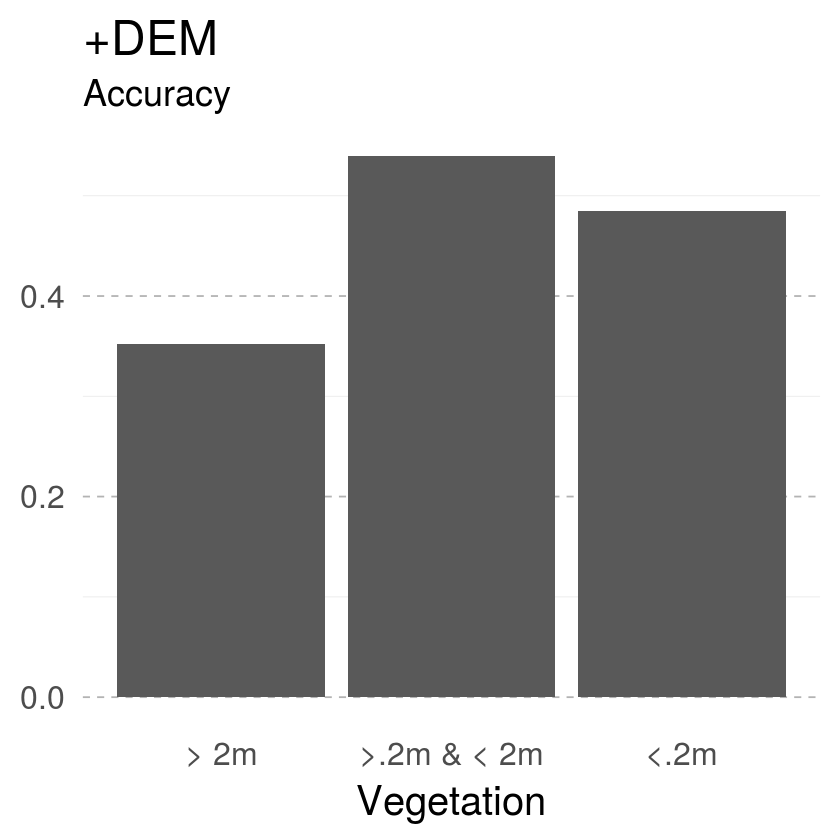

In [140]:
ggplot() + 
geom_bar(aes(x='1',y=ndf_dem['Accuracy',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_dem['Accuracy',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_dem['Accuracy',c('low')]),stat="identity") + theme_minimal(base_size = 24) +
ggpubr::theme_cleveland() +labs(x="Vegetation", subtitle="Accuracy",title="+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

a_dem <- ggplot() + 
geom_bar(aes(x='1',y=ndf_dem['Accuracy',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_dem['Accuracy',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_dem['Accuracy',c('low')]),stat="identity") + theme_minimal(base_size = 24) +
ggpubr::theme_pubclean() +labs(x="Vegetation", y="",subtitle="Accuracy",title="+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))


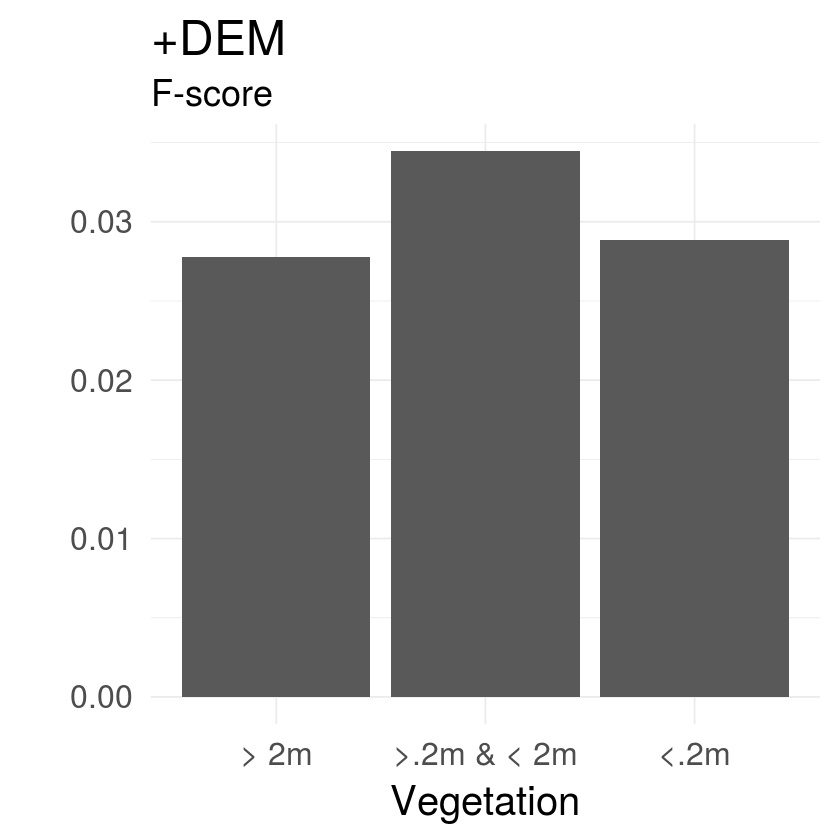

In [144]:
ggplot() + 
geom_bar(aes(x='1',y=ndf_dem_f['F1',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_dem_f['F1',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_dem_f['F1',c('low')]),stat="identity") + 
theme_minimal(base_size = 24) +
labs(x="Vegetation",y="", subtitle="F-score",title="+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

f_dem <- ggplot() + 
geom_bar(aes(x='1',y=ndf_dem_f['F1',c('high')]),stat="identity")  +
geom_bar(aes(x='2',y=ndf_dem_f['F1',c('med')]),stat="identity") +
geom_bar(aes(x='3',y=ndf_dem_f['F1',c('low')]),stat="identity") + 
theme_minimal(base_size = 24) + ggpubr::theme_pubclean() +
labs(x="Vegetation",y="", subtitle="F-score",title="+DEM") +
scale_x_discrete(labels= c('> 2m','>.2m & < 2m','<.2m'))

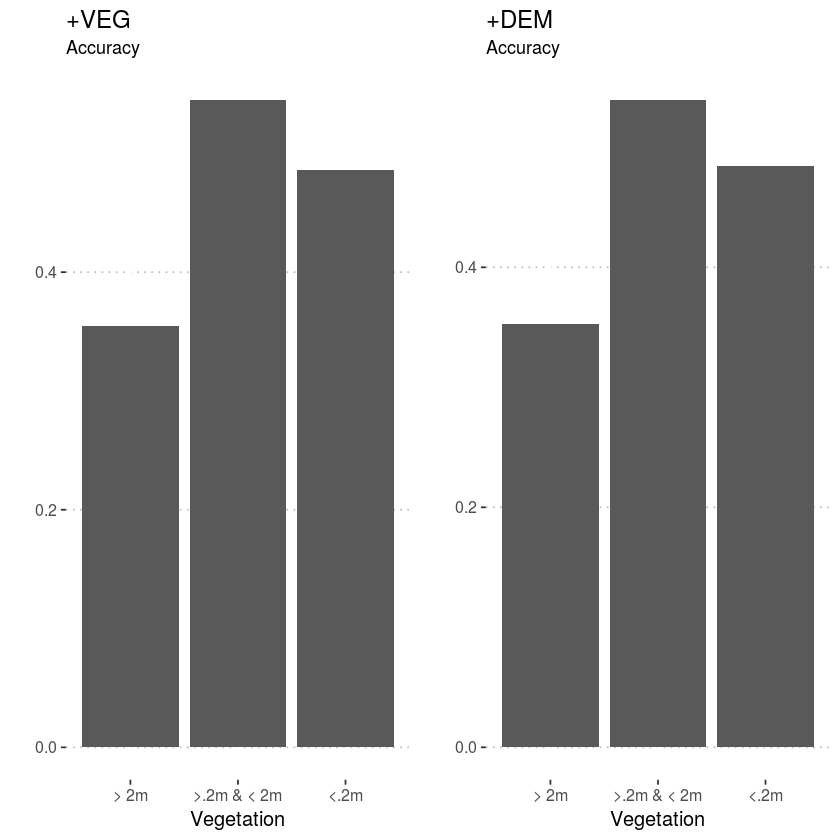

In [169]:

library(cowplot)
plot_grid(a_veg,a_dem)
ggsave("models_veg_dem_accuracy.png",dpi=300, dev='png', height=12, width=12, units="in")

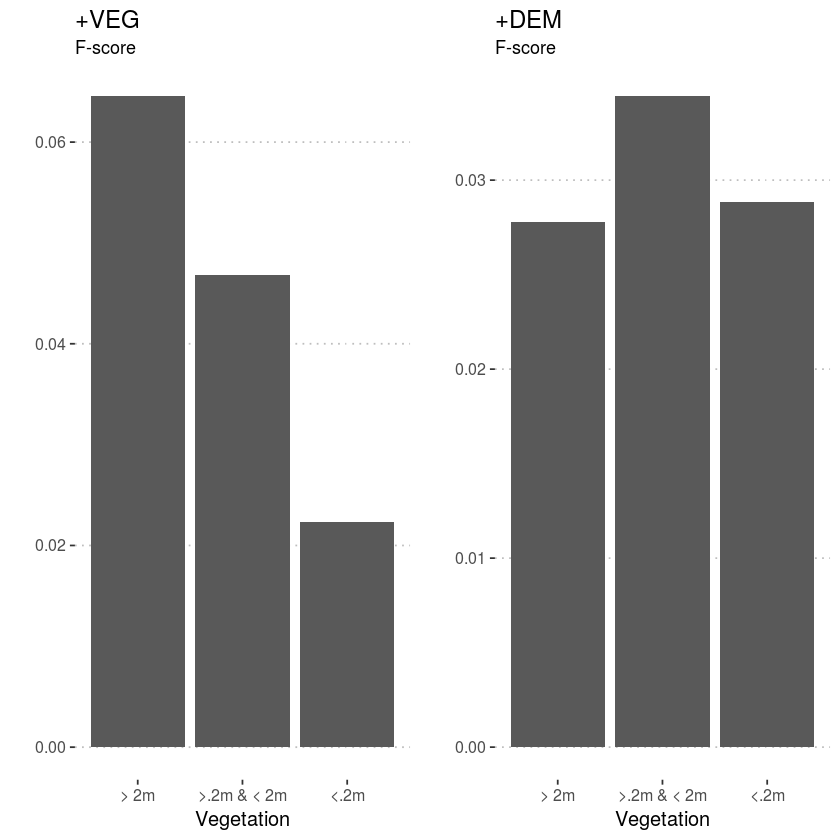

In [170]:
plot_grid(f_veg,f_dem)
ggsave("models_veg_dem_fscore.png",dpi=300, dev='png', height=12, width=12, units="in")

In [158]:
# get all the rasters aso tiles
#list files in a specific folder
folder <- "~/base"
base_aso <- list.files(path = folder)
#BASE only
asos_base <- list()
preds_base <-list()
for (vaso in base_aso)
{
    #print(vaso)
    recur = list.files(path=paste(folder,"/",vaso,sep=""),recursive = TRUE)
    #print(recur)
    for (filename in recur)
        {
          if (startsWith(filename,'mask/') & endsWith(filename,"merged.tif"))
              asos_base <- append(asos_base,paste(folder,"/",vaso,"/",filename,sep=""))
              
           if (startsWith(filename,'preds/') & endsWith(filename,"merged.tif"))
              preds_base <- append(preds_base,paste(folder,"/",vaso,"/",filename,sep=""))    
        }
}

print(asos_base) 
print(preds_base)   

[[1]]
[1] "~/base/planet-snowcover-experiments:planet-snowcover-2020-03-12-02-43-15-610:planet-snowcover-imagery:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[2]]
[1] "~/base/planet-snowcover-experiments:planet-snowcover-2020-03-12-02-43-15-610:planet-snowcover-imagery:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[3]]
[1] "~/base/planet-snowcover-experiments:planet-snowcover-2020-03-12-02-43-15-610:planet-snowcover-imagery:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[4]]
[1] "~/base/planet-snowcover-experiments:planet-snowcover-2020-03-12-02-43-15-610:planet-snowcover-imagery:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[5]]
[1] "~/base/planet-snowcover-experiments:planet-snowcover-2020-03-12-02-43-15-610:planet-snowcover-imagery:20180528_181110_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_U

In [159]:
aso_base_un <- unlist(asos_base)
pred_base_un <- unlist(preds_base)
rlist_aso_base <-sapply(c(aso_base_un), FUN = ListRasters)
predlist_pred_base <-sapply(c(pred_base_un), FUN = ListRasters)

In [160]:
rlist_aso_base_repro <- rlist_aso_base
#reproject to be same
for (i in 2:length(rlist_aso_base))
{
       rlist_aso_base_repro[i] <- projectRaster(rlist_aso_base[[i]],rlist_aso_base[[1]])
}
predlist_pred_base_repro <- predlist_pred_base
#reproject to be same
for (i in 2:length(predlist_pred_base))
{
       predlist_pred_base_repro[i] <- projectRaster(predlist_pred_base[[i]],predlist_pred_base[[1]])
}

Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_base[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_base[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_base[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_base[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_base[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_base[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRaster(rlist_aso_base[[i]], :
“implicit list embedding of S4 objects is deprecated”Warning message in `[<-`(`*tmp*`, i, value = projectRas

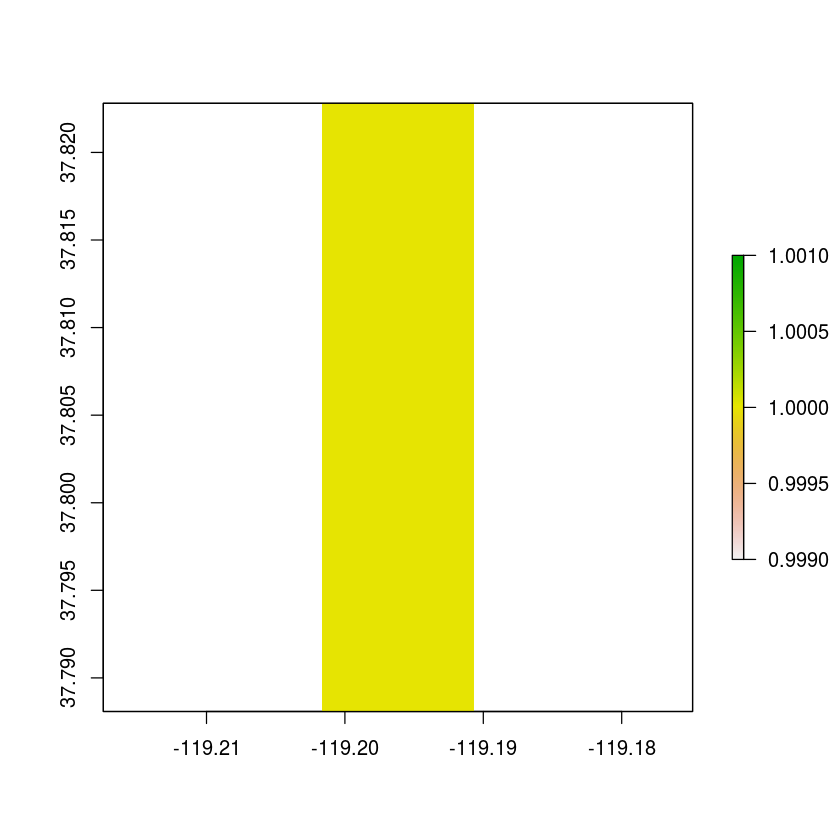

In [161]:
#visualize
names(predlist_pred_base_repro)[1:2] <- c('x', 'y')
predlist_pred_base_repro$fun <- mean
predlist_pred_base_repro$na.rm <- TRUE

pred_base <- do.call(mosaic, predlist_pred_base_repro)
plot(pred_base)

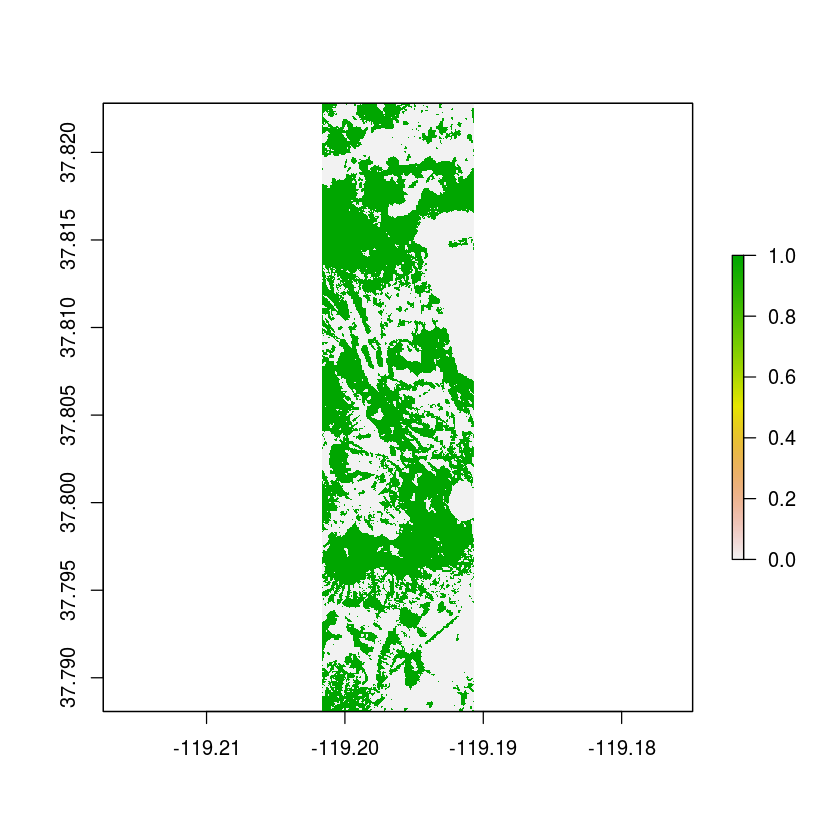

In [162]:
#visualize
names(rlist_aso_base_repro)[1:2] <- c('x', 'y')
rlist_aso_base_repro$fun <- mean
rlist_aso_base_repro$na.rm <- TRUE

aso_base_orig <- do.call(mosaic, rlist_aso_base_repro)
plot(aso_base_orig)

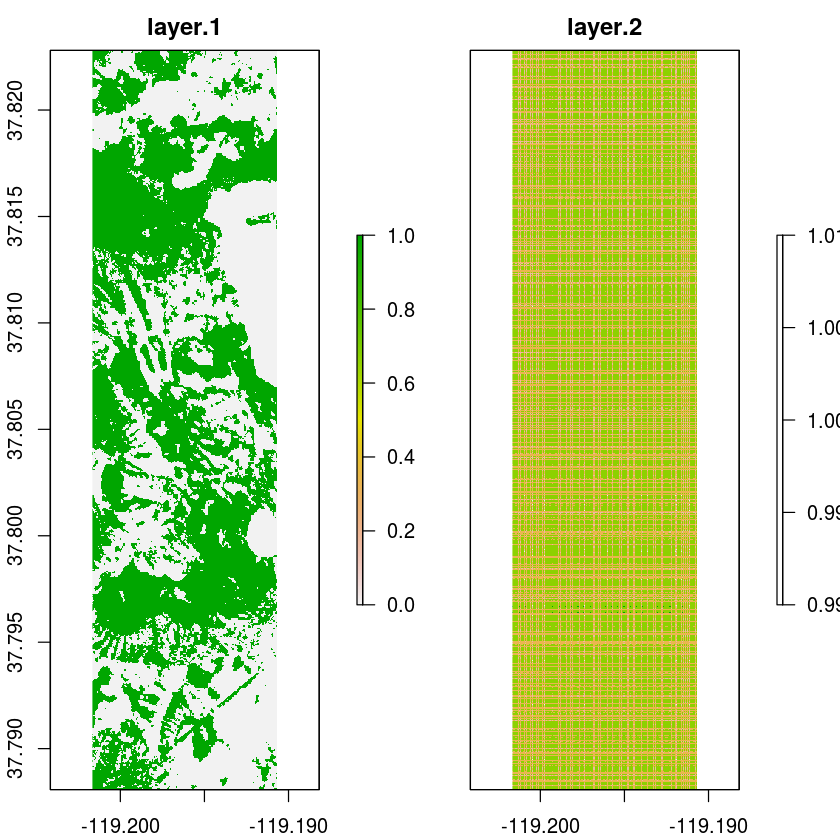

In [163]:
pred_base_aso <- stack(aso_base_orig,projectRaster(pred_base,aso_base_orig))
plot(pred_base_aso)

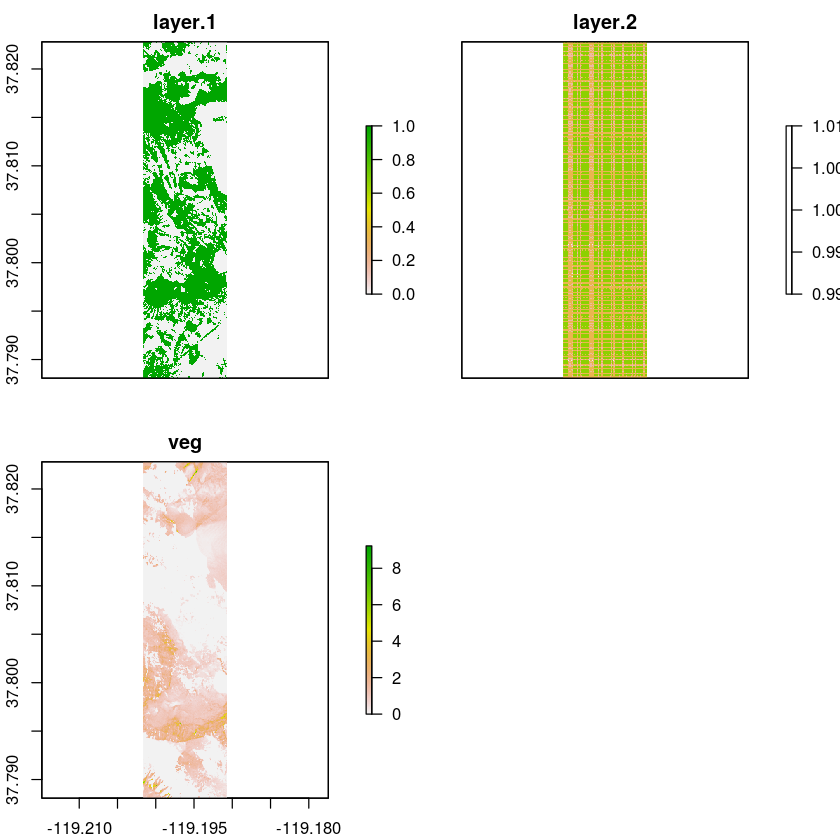

In [164]:
allthree <- stack(pred_base_aso,crop(vegResamp,extent(pred_base_aso)))
plot(allthree)

In [165]:
data_matrix_base <- rasterToPoints(allthree)
head(data_matrix_base)

x,y,layer.1,layer.2,veg
-119.2016,37.82279,1,1,1.508473
-119.2016,37.82279,1,1,1.483356
-119.2016,37.82279,1,1,1.436312
-119.2016,37.82279,1,1,1.432309
-119.2016,37.82279,1,1,1.500402
-119.2015,37.82279,1,1,1.430423


In [166]:
datafra_comb_base<- data_matrix_base %>% as.data.frame()
colnames(datafra_comb_base) <- c('x','y','aso','mlbase','veg')

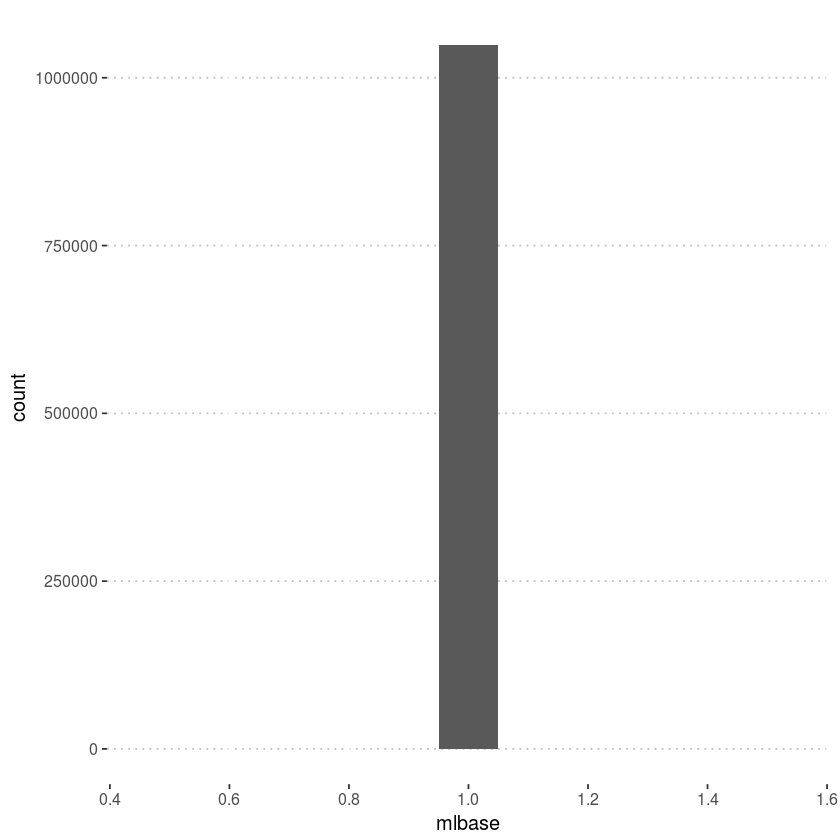

In [167]:
datafra_comb_base %>% ggplot(aes(mlbase)) +
  geom_histogram(binwidth = 0.1) + ggpubr::theme_pubclean()

In [168]:
unique(datafra_comb_base$mlbase)

[1] 1 1 1 1 1